In [1]:
# Feature Engineering - Customer Churn
# This notebook creates advanced features to improve model performance

# Step 1: Setup
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from src.preprocessing import load_data, split_data
from src.feature_engineering import (
    ChurnFeatureEngineer, 
    add_all_features,
    get_feature_importance_groups
)
from src.config import TARGET_COLUMN

sns.set_style("whitegrid")
print("✅ Setup complete")

✅ Setup complete


In [2]:
# Step 2: Load Data
df = load_data()
print(f"Original dataset shape: {df.shape}")
print(f"Original features: {df.shape[1]}")


✅ Loaded data: (200000, 11)
Original dataset shape: (200000, 11)
Original features: 11


In [3]:
# Step 3: Apply Feature Engineering
print("\n" + "="*70)
print("CREATING ENGINEERED FEATURES")
print("="*70)

# Add all engineered features
df_engineered = add_all_features(df)

print(f"\nAfter feature engineering:")
print(f"Total features: {df_engineered.shape[1]}")
print(f"New features added: {df_engineered.shape[1] - df.shape[1]}")

# Show new features
original_cols = set(df.columns)
new_cols = [col for col in df_engineered.columns if col not in original_cols]

print(f"\nNew features created ({len(new_cols)}):")
for col in sorted(new_cols):
    print(f"  ✓ {col}")


CREATING ENGINEERED FEATURES

After feature engineering:
Total features: 30
New features added: 19

New features created (19):
  ✓ ChargesPerMonth
  ✓ ChargesPerUsagePoint
  ✓ EngagementScore
  ✓ HasManyTickets
  ✓ IsDisengagedExpensive
  ✓ IsHighCharges
  ✓ IsHighUsage
  ✓ IsLongTenure
  ✓ IsLowUsage
  ✓ IsMediumTenure
  ✓ IsNewCustomer
  ✓ IsNewExpensive
  ✓ IsShortTenure
  ✓ TenureYears
  ✓ Tenure_MonthlyCharges
  ✓ Tenure_Usage
  ✓ TicketsPerMonth
  ✓ Tickets_MonthlyCharges
  ✓ Usage_MonthlyCharges


In [4]:
# Step 4: Examine New Features
print("\n" + "="*70)
print("ENGINEERED FEATURES STATISTICS")
print("="*70)

# Show statistics for new features
print("\nRatio Features:")
ratio_features = ['ChargesPerMonth', 'ChargesPerUsagePoint', 'TicketsPerMonth']
print(df_engineered[ratio_features].describe())

print("\nTenure Features:")
tenure_features = ['IsNewCustomer', 'IsShortTenure', 'IsMediumTenure', 'IsLongTenure', 'TenureYears']
print(df_engineered[tenure_features].describe())

print("\nEngagement Features:")
engagement_features = ['IsLowUsage', 'IsHighUsage', 'EngagementScore']
print(df_engineered[engagement_features].describe())

print("\nRisk Indicators:")
risk_features = ['IsHighCharges', 'HasManyTickets', 'IsNewExpensive', 'IsDisengagedExpensive']
print(df_engineered[risk_features].describe())


ENGINEERED FEATURES STATISTICS

Ratio Features:
       ChargesPerMonth  ChargesPerUsagePoint  TicketsPerMonth
count    200000.000000         200000.000000    200000.000000
mean         65.306111              1.347365         0.136985
std          23.541917              1.144349         0.212766
min          10.000000              0.198020         0.000000
25%          48.669713              0.879747         0.035714
50%          64.964446              1.212447         0.076923
75%          81.353388              1.627100         0.151515
max         147.857143            137.060000         4.000000

Tenure Features:
       IsNewCustomer  IsShortTenure  IsMediumTenure   IsLongTenure  \
count  200000.000000  200000.000000   200000.000000  200000.000000   
mean        0.101205       0.242405        0.303910       0.453685   
std         0.301601       0.428539        0.459945       0.497852   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.000000     


NEW FEATURES VS CHURN


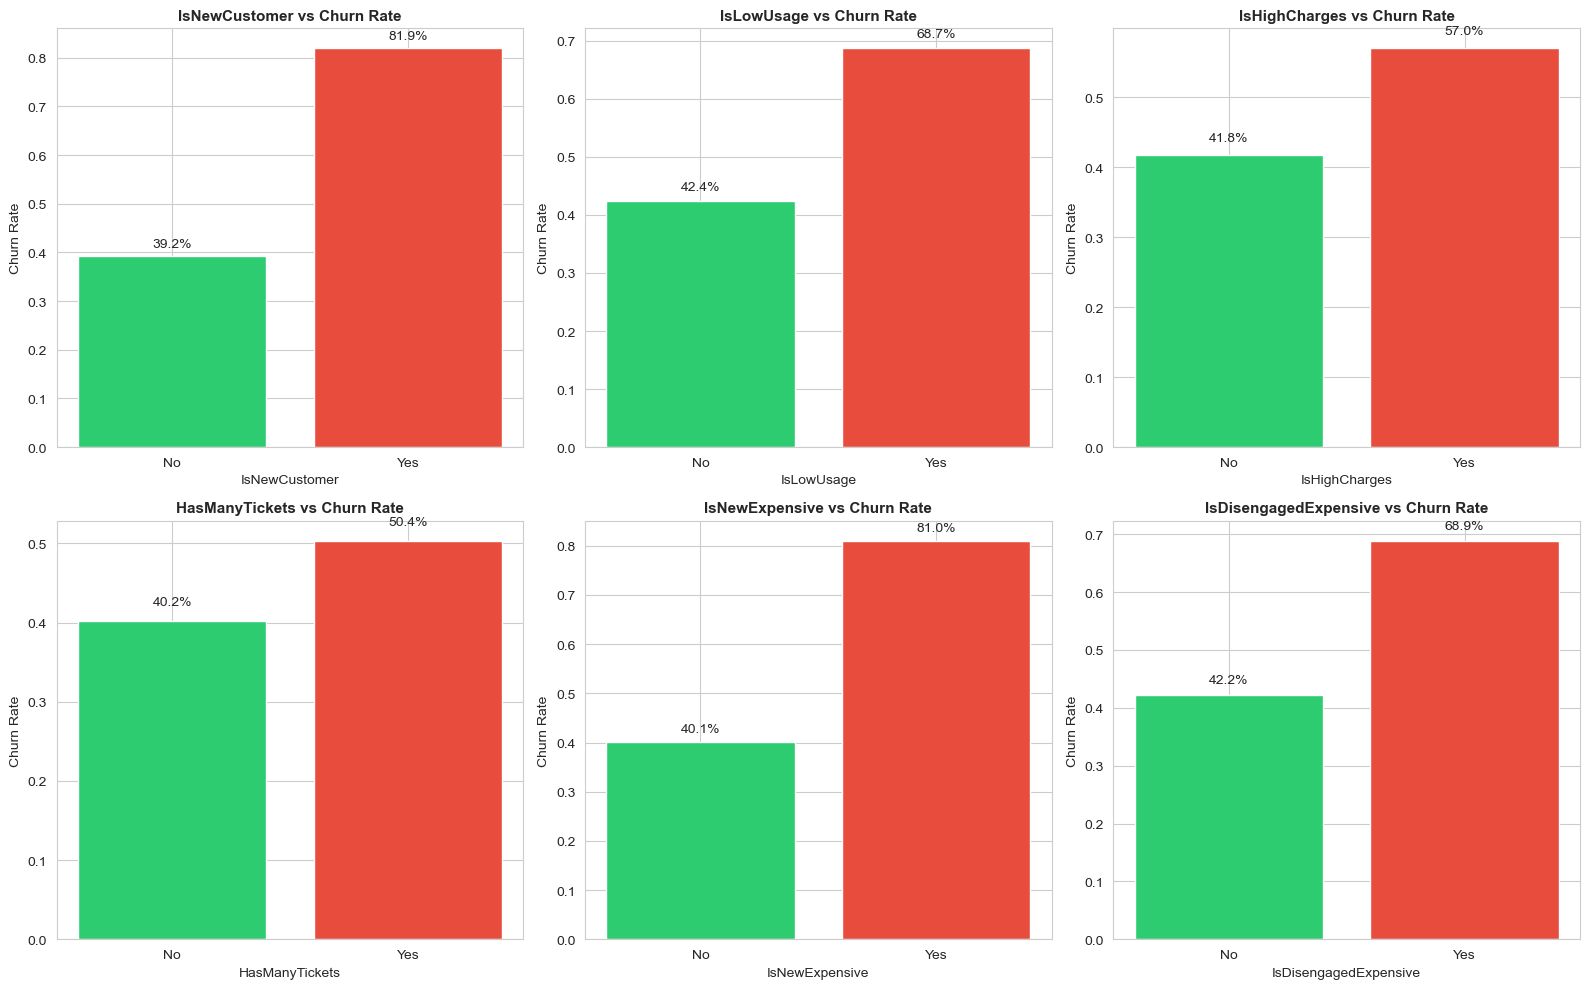

In [5]:
# Step 5: Visualize New Features vs Churn
print("\n" + "="*70)
print("NEW FEATURES VS CHURN")
print("="*70)

# Binary features
binary_features = ['IsNewCustomer', 'IsLowUsage', 'IsHighCharges', 'HasManyTickets', 
                   'IsNewExpensive', 'IsDisengagedExpensive']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(binary_features):
    churn_by_feature = df_engineered.groupby(col)[TARGET_COLUMN].mean()
    axes[idx].bar(churn_by_feature.index, churn_by_feature.values, 
                  color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Churn Rate', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Churn Rate')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['No', 'Yes'])
    
    # Add value labels
    for i, v in enumerate(churn_by_feature.values):
        axes[idx].text(i, v + 0.02, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

In [6]:
# Step 6: Churn Rates for Binary Indicators
print("\nChurn rates for binary indicators:")
for col in binary_features:
    churn_rate = df_engineered.groupby(col)[TARGET_COLUMN].mean()
    print(f"\n{col}:")
    print(f"  No  (0): {churn_rate[0]:.1%}")
    print(f"  Yes (1): {churn_rate[1]:.1%}")
    print(f"  Lift: {churn_rate[1] / churn_rate[0]:.2f}x")



Churn rates for binary indicators:

IsNewCustomer:
  No  (0): 39.2%
  Yes (1): 81.9%
  Lift: 2.09x

IsLowUsage:
  No  (0): 42.4%
  Yes (1): 68.7%
  Lift: 1.62x

IsHighCharges:
  No  (0): 41.8%
  Yes (1): 57.0%
  Lift: 1.37x

HasManyTickets:
  No  (0): 40.2%
  Yes (1): 50.4%
  Lift: 1.25x

IsNewExpensive:
  No  (0): 40.1%
  Yes (1): 81.0%
  Lift: 2.02x

IsDisengagedExpensive:
  No  (0): 42.2%
  Yes (1): 68.9%
  Lift: 1.63x


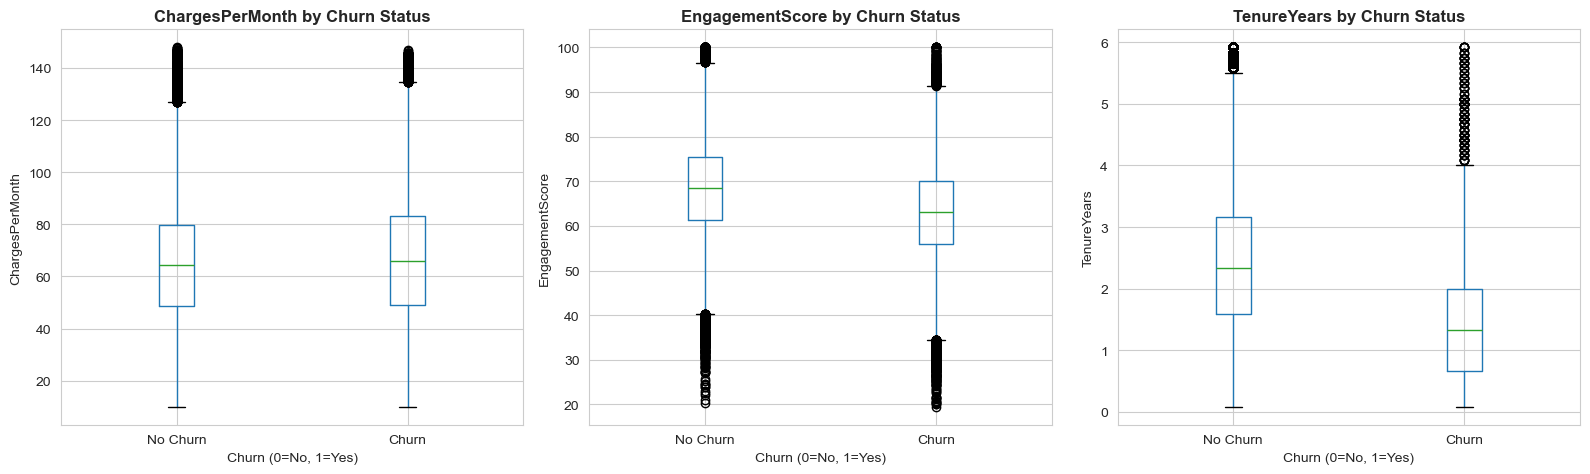

In [7]:
# Step 7: Continuous Engineered Features
continuous_features = ['ChargesPerMonth', 'EngagementScore', 'TenureYears']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(continuous_features):
    df_engineered.boxplot(column=col, by=TARGET_COLUMN, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn (0=No, 1=Yes)')
    axes[idx].set_ylabel(col)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No Churn', 'Churn'])

plt.suptitle('')
plt.tight_layout()
plt.show()

In [8]:
# Step 8: Interaction Features Analysis
interaction_features = ['Tenure_MonthlyCharges', 'Usage_MonthlyCharges', 
                        'Tenure_Usage', 'Tickets_MonthlyCharges']

print("\n" + "="*70)
print("INTERACTION FEATURES CORRELATION WITH CHURN")
print("="*70)

interaction_corr = df_engineered[interaction_features + [TARGET_COLUMN]].corr()[TARGET_COLUMN].drop(TARGET_COLUMN)
print("\nCorrelation with churn:")
print(interaction_corr.sort_values(ascending=False))



INTERACTION FEATURES CORRELATION WITH CHURN

Correlation with churn:
Tickets_MonthlyCharges    0.131995
Usage_MonthlyCharges     -0.049595
Tenure_MonthlyCharges    -0.307357
Tenure_Usage             -0.424726
Name: Churn, dtype: float64


In [9]:
# Step 9: Feature Groups Summary
print("\n" + "="*70)
print("FEATURE GROUPS SUMMARY")
print("="*70)

groups = get_feature_importance_groups()

print("\nFeature groups defined:")
for group_name, features in groups.items():
    print(f"\n{group_name.upper()} ({len(features)} features):")
    for feat in features:
        if feat in df_engineered.columns:
            print(f"  ✓ {feat}")


FEATURE GROUPS SUMMARY

Feature groups defined:

BASE_NUMERICAL (6 features):
  ✓ Age
  ✓ Tenure
  ✓ MonthlyCharges
  ✓ TotalCharges
  ✓ SupportTickets
  ✓ UsageScore

BASE_CATEGORICAL (3 features):
  ✓ Gender
  ✓ Contract
  ✓ PaymentMethod

RATIO_FEATURES (3 features):
  ✓ ChargesPerMonth
  ✓ ChargesPerUsagePoint
  ✓ TicketsPerMonth

TENURE_FEATURES (5 features):
  ✓ IsNewCustomer
  ✓ IsShortTenure
  ✓ IsMediumTenure
  ✓ IsLongTenure
  ✓ TenureYears

ENGAGEMENT_FEATURES (3 features):
  ✓ IsLowUsage
  ✓ IsHighUsage
  ✓ EngagementScore

RISK_INDICATORS (4 features):
  ✓ IsHighCharges
  ✓ HasManyTickets
  ✓ IsNewExpensive
  ✓ IsDisengagedExpensive

INTERACTIONS (4 features):
  ✓ Tenure_MonthlyCharges
  ✓ Usage_MonthlyCharges
  ✓ Tenure_Usage
  ✓ Tickets_MonthlyCharges



HIGH-RISK CUSTOMER PROFILE

Churn rate by risk score:
           Customer_Count  Churn_Rate
RiskScore                            
0                   97501    0.313484
1                   73995    0.470775
2                   20168    0.711771
3                    5980    0.850836
4                    1881    0.908559
5                     424    0.943396
6                      51    1.000000


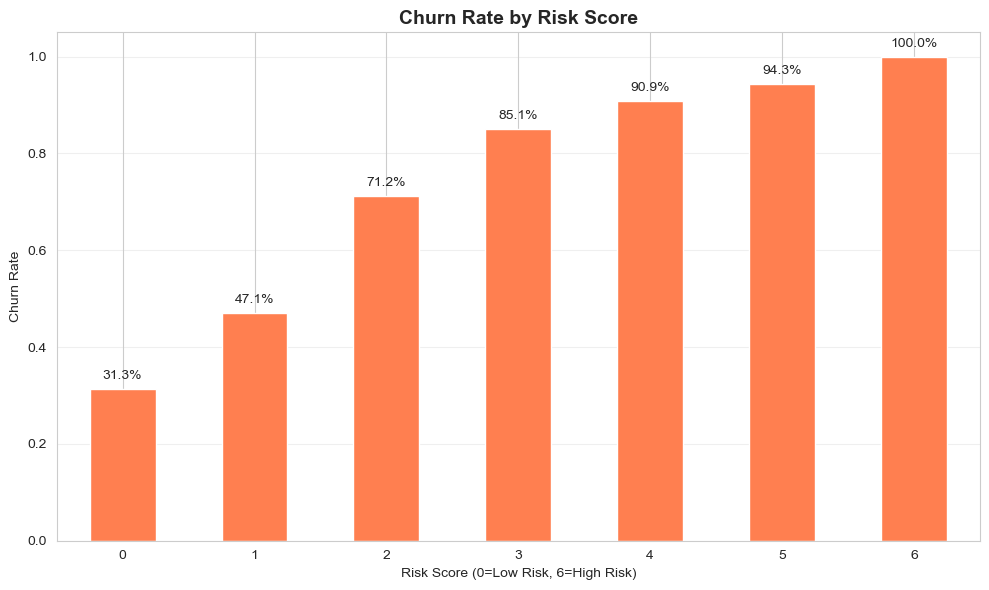

In [10]:
# Step 10: High-Risk Customer Analysis
print("\n" + "="*70)
print("HIGH-RISK CUSTOMER PROFILE")
print("="*70)

# Define high-risk customers (multiple risk indicators)
df_engineered['RiskScore'] = (
    df_engineered['IsNewCustomer'].astype(int) +
    df_engineered['IsHighCharges'].astype(int) +
    df_engineered['HasManyTickets'].astype(int) +
    df_engineered['IsLowUsage'].astype(int) +
    df_engineered['IsNewExpensive'].astype(int) +
    df_engineered['IsDisengagedExpensive'].astype(int)
)

risk_analysis = df_engineered.groupby('RiskScore')[TARGET_COLUMN].agg(['count', 'mean'])
risk_analysis.columns = ['Customer_Count', 'Churn_Rate']
print("\nChurn rate by risk score:")
print(risk_analysis)

# Visualize
plt.figure(figsize=(10, 6))
risk_analysis['Churn_Rate'].plot(kind='bar', color='coral')
plt.title('Churn Rate by Risk Score', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score (0=Low Risk, 6=High Risk)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(alpha=0.3, axis='y')

for i, v in enumerate(risk_analysis['Churn_Rate'].values):
    plt.text(i, v + 0.02, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

In [11]:
# Step 11: Compare Original vs Engineered Features
print("\n" + "="*70)
print("ORIGINAL VS ENGINEERED FEATURES COMPARISON")
print("="*70)

# Original feature correlations
original_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 
                     'SupportTickets', 'UsageScore']
original_corr = df_engineered[original_features + [TARGET_COLUMN]].corr()[TARGET_COLUMN].drop(TARGET_COLUMN)

# Top engineered feature correlations
engineered_only = [col for col in new_cols if col in df_engineered.select_dtypes(include=[np.number]).columns]
engineered_corr = df_engineered[engineered_only + [TARGET_COLUMN]].corr()[TARGET_COLUMN].drop(TARGET_COLUMN)

print("\nTop 5 original features (by correlation):")
print(original_corr.abs().sort_values(ascending=False).head())

print("\nTop 10 engineered features (by correlation):")
print(engineered_corr.abs().sort_values(ascending=False).head(10))



ORIGINAL VS ENGINEERED FEATURES COMPARISON

Top 5 original features (by correlation):
Tenure            0.431266
TotalCharges      0.307357
UsageScore        0.228169
MonthlyCharges    0.115220
SupportTickets    0.097400
Name: Churn, dtype: float64

Top 10 engineered features (by correlation):
TenureYears              0.431266
Tenure_Usage             0.424726
IsLongTenure             0.373864
IsShortTenure            0.327840
Tenure_MonthlyCharges    0.307357
TicketsPerMonth          0.278096
IsNewCustomer            0.260160
EngagementScore          0.245649
IsNewExpensive           0.226756
IsHighUsage              0.171226
Name: Churn, dtype: float64


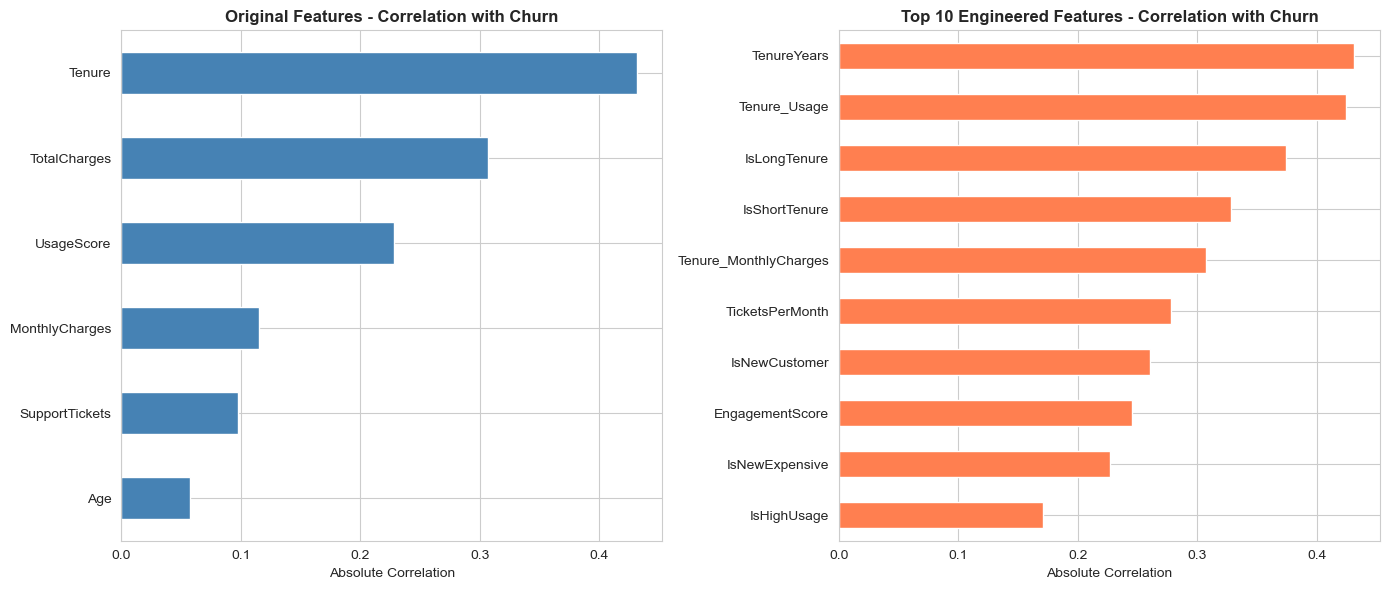

In [12]:
# Step 12: Visualization - Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original features correlation
top_original = original_corr.abs().sort_values(ascending=False)
top_original.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Original Features - Correlation with Churn', fontsize=12, fontweight='bold')
ax1.set_xlabel('Absolute Correlation')
ax1.invert_yaxis()

# Engineered features correlation
top_engineered = engineered_corr.abs().sort_values(ascending=False).head(10)
top_engineered.plot(kind='barh', ax=ax2, color='coral')
ax2.set_title('Top 10 Engineered Features - Correlation with Churn', fontsize=12, fontweight='bold')
ax2.set_xlabel('Absolute Correlation')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


In [13]:
# Step 13: Save Engineered Dataset
from src.config import PROCESSED_DATA_DIR

# Save for use in modeling
output_file = PROCESSED_DATA_DIR / "engineered_churn_data.csv"
df_engineered.to_csv(output_file, index=False)

print(f"\n💾 Engineered dataset saved to: {output_file}")
print(f"   Shape: {df_engineered.shape}")
print(f"   Total features: {df_engineered.shape[1]}")

# Step 14: Key Insights
print("\n" + "="*70)
print("KEY FEATURE ENGINEERING INSIGHTS")
print("="*70)

max_risk_score = df_engineered['RiskScore'].max()
high_risk_churn = df_engineered[df_engineered['RiskScore'] >= 4][TARGET_COLUMN].mean()
low_risk_churn = df_engineered[df_engineered['RiskScore'] <= 1][TARGET_COLUMN].mean()

insights = f"""
1. FEATURE EXPANSION:
   - Started with {df.shape[1]} features
   - Created {len(new_cols)} new features
   - Total features: {df_engineered.shape[1]}

2. HIGH-IMPACT FEATURES CREATED:
   - IsNewExpensive: Identifies high-risk new customers
   - IsDisengagedExpensive: Flags unhappy expensive customers
   - RiskScore: Composite risk indicator (0-{max_risk_score})

3. RISK SCORE EFFECTIVENESS:
   - Low risk (score ≤1): {low_risk_churn:.1%} churn
   - High risk (score ≥4): {high_risk_churn:.1%} churn
   - Risk score provides {high_risk_churn/low_risk_churn:.1f}x separation

4. INTERACTION FEATURES:
   - Tenure × MonthlyCharges captures customer value
   - Usage × MonthlyCharges identifies value for money
   - These interactions capture non-linear relationships

5. NEXT STEPS:
   - Use these features in model training
   - Feature importance analysis will show which add value
   - May need feature selection to avoid overfitting
"""

print(insights)

print("\n✅ Feature Engineering Complete!")
print("📊 Next step: Model Training (notebook 03)")


💾 Engineered dataset saved to: C:\Users\shali\Documents\shalin\google\churn-prediction-system\data\processed\engineered_churn_data.csv
   Shape: (200000, 31)
   Total features: 31

KEY FEATURE ENGINEERING INSIGHTS

1. FEATURE EXPANSION:
   - Started with 11 features
   - Created 19 new features
   - Total features: 31

2. HIGH-IMPACT FEATURES CREATED:
   - IsNewExpensive: Identifies high-risk new customers
   - IsDisengagedExpensive: Flags unhappy expensive customers
   - RiskScore: Composite risk indicator (0-6)

3. RISK SCORE EFFECTIVENESS:
   - Low risk (score ≤1): 38.1% churn
   - High risk (score ≥4): 91.7% churn
   - Risk score provides 2.4x separation

4. INTERACTION FEATURES:
   - Tenure × MonthlyCharges captures customer value
   - Usage × MonthlyCharges identifies value for money
   - These interactions capture non-linear relationships

5. NEXT STEPS:
   - Use these features in model training
   - Feature importance analysis will show which add value
   - May need feature se